In [2]:
from TessTransient import TessTransient 

## Initialise event with estimated RA, Declination, Eventtime, and Associated Location Error. 

### Also good to feed in your own path for where to download.

In [5]:
ra=277.48
dec=61.78
eventtime=58951.381019
error=2

path='../../SampleTessTransient/'
eventname='GRB200412B'

event = TessTransient(ra=ra, dec=dec, eventtime=eventtime, error=error, path=path, eventname=eventname)

Event occured within TESS FoV!


In [5]:
event.download()   # download FITS files to path, can choose number={int} for a select number to sample.

100%|██████████| 144/144 [01:55<00:00,  1.24it/s]


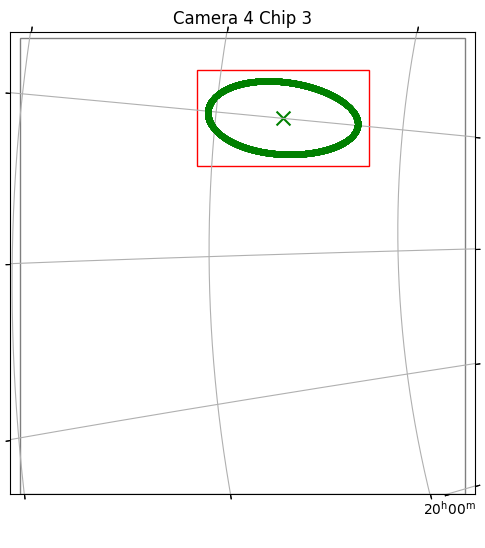

In [6]:
event.find_cuts()    # finds cut out of chip that encompasses given error region.

In [7]:
event.make_cube()     # forms a data cube from FITS files

Cubing


In [8]:
event.make_cuts()    # generate FITS files for each cut 

Cutting Cam 4 Chip 3 cut #1 (of 1)
Cam 4 Chip 3 cut 1 complete.






--Reduction Cam 4 Chip 3 Cut 1 (of 1)--
made reference
made source mask
calculating background
background subtracted
calculating centroids
!!Re-running for difference image!!
shifting images
remade mask
background


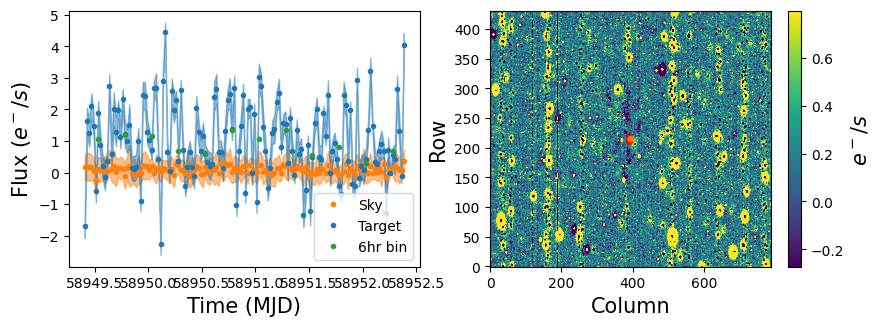

--Reduction Complete (Time: 2.56 mins)--
--Writing--
getting data
inputting data
writing data
--Writing Complete (Time: 2.64 mins)--




In [9]:
event.reduce()       # generate FITS files with reduced data for each cut

### This above process can be completed in entirety using event.full()

## Now we try to detect events in these cuts. 
#### (Note that this event detector is tailored for afterglows right now and will need adjusting for other physical phenomena)   

--COLLECTING DATA--
Getting Flux
Getting Time
--DONE--


Fetching Events


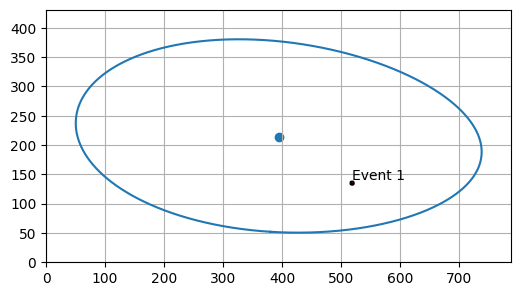

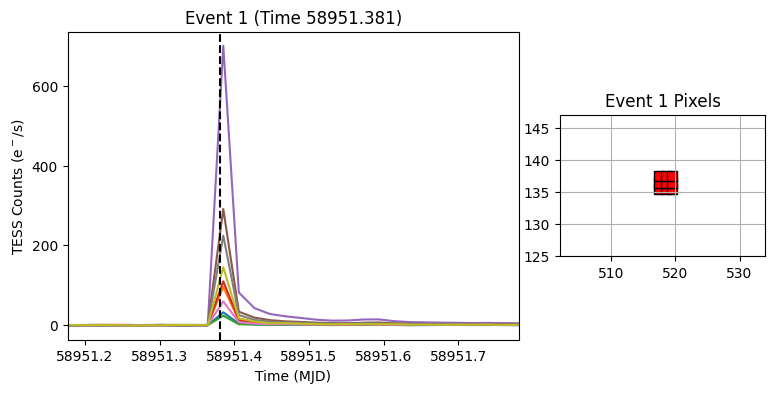

In [10]:
event.detect_events()  # 

In [12]:
event.Detector.make_video(eventnumber=1)  # Make a video of the event

Making Frames
Video Made


In [14]:
event.Detector.event_coords(eventnumber=1)   # printout realworld coords of this event

Cut WCS Coords: RA = 278.31171419817474, DEC = 62.53592801016973
Base WCS Coords: RA = 278.3173266699366, DEC = 62.52539979599132


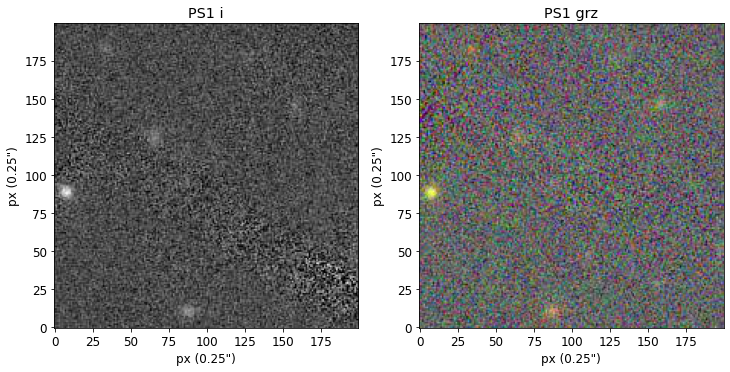

In [8]:
event.Detector.event_cutout(eventnumber=1)   # PanSTARRS / SkyMapper cutout of the region, size can be specified in arcsecs 

### Other functionality for an interesting event can be obtained. For example, calling `event.Detector.tessreduce_event(eventnumber)` will perform the full TESSreduce process on the coordinates of the event such that the data can be oberved/manipulated via a TESSreduce interface approach.

## In some cases, an error region may go beyond the edges of a single chip

In [2]:
ra = 349.93
dec=-47.84
eventtime=58337.096966
error=6.65
path='../../SampleTessTransient/'
eventname='GRB180807A'

event2 = TessTransient(ra=349.93,dec=-47.84,eventtime=58337.096966,error=6.65,path='../../SampleTessTransient/',eventname='GRB180807A')

Event occured within TESS FoV!


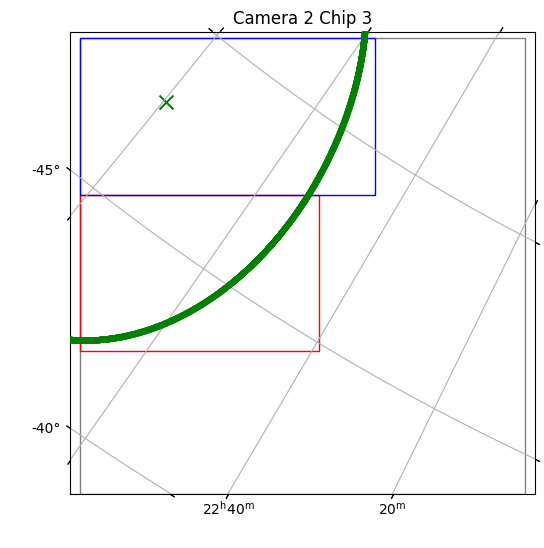

In [3]:
event2.download(number=1)
event2.find_cuts()

In [4]:
event2.find_neighbour_chips()  # This shows us that data may be found on Cam2, Chip2 as well

Pointing: South
This chip: Camera 2, Chip 3.
------------------------------
Neighbouring Chips Required:
Camera 2, Chip 2 (Up).


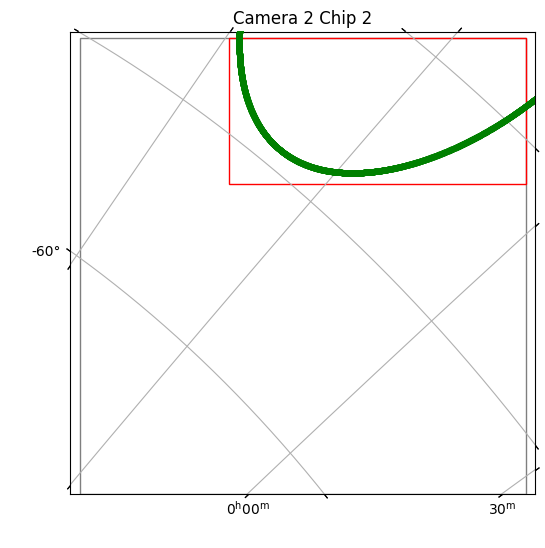

In [13]:
event2.download(cam=2,chip=2,number=1)   # download a file to a new folder for Cam2Chip2
event2.find_cuts(cam=2,chip=2)